# 1) importing libraries 


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,median_absolute_error 
from sklearn.model_selection import GridSearchCV
import joblib

import warnings
warnings.filterwarnings('ignore')


%matplotlib inline
sns.set(style='whitegrid',rc={'figure.figsize': [10, 10]}, font_scale=1.3)

# 2) Reading data

In [7]:
df=pd.read_csv('C:/Users/Abd AL-Rahman/Desktop/graduation project/USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [9]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


# 3) Data cleaning and preprocessing

In [10]:
df['Avg. Area Number of Bedrooms']=df['Avg. Area Number of Bedrooms'].apply(lambda x: round(x))
df['Avg. Area Number of Rooms']=df['Avg. Area Number of Rooms'].apply(lambda x: round(x))
df['AreaIncome']=df['Avg. Area Income'].apply(lambda x: round(x))
df['AreaHouseAge']=df['Avg. Area House Age'].apply(lambda x: round(x))
df['AreaPopulationInt']=df['Area Population'].apply(lambda x: round(x))

In [11]:
df=df.rename(columns={'Avg. Area Number of Rooms':'NumberOfRooms'
                      ,'Avg. Area Number of Bedrooms':'NumberOfBedrooms'})

In [12]:
df.head()

,Avg. Area Income,Avg. Area House Age,NumberOfRooms,NumberOfBedrooms,Area Population,Price,Address,AreaIncome,AreaHouseAge,AreaPopulationInt
0,79545.458574,5.682861,7,4,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",79545,6,23087
1,79248.642455,6.002900,7,3,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA...",79249,6,40173
2,61287.067179,5.865890,9,5,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",61287,6,36882
3,63345.240046,7.188236,6,3,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820,63345,7,34310
4,59982.197226,5.040555,8,4,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386,59982,5,26354


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Avg. Area Income     5000 non-null   float64
 1   Avg. Area House Age  5000 non-null   float64
 2   NumberOfRooms        5000 non-null   int64  
 3   NumberOfBedrooms     5000 non-null   int64  
 4   Area Population      5000 non-null   float64
 5   Price                5000 non-null   float64
 6   Address              5000 non-null   object 
 7   AreaIncome           5000 non-null   int64  
 8   AreaHouseAge         5000 non-null   int64  
 9   AreaPopulationInt    5000 non-null   int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 390.8+ KB


In [14]:
df.describe()

,Avg. Area Income,Avg. Area House Age,NumberOfRooms,NumberOfBedrooms,Area Population,Price,AreaIncome,AreaHouseAge,AreaPopulationInt
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,68583.108984,5.977222,6.988400,3.741200,36163.516039,1.232073e+06,68583.103800,5.974800,36163.512200
std,10657.991214,0.991456,1.044262,1.228057,9925.650114,3.531176e+05,10657.990158,1.038066,9925.651196
min,17796.631190,2.644304,3.000000,2.000000,172.610686,1.593866e+04,17797.000000,3.000000,173.000000
25%,61480.562388,5.322283,6.000000,3.000000,29403.928702,9.975771e+05,61480.500000,5.000000,29404.000000
50%,68804.286404,5.970429,7.000000,4.000000,36199.406689,1.232669e+06,68804.500000,6.000000,36199.000000
75%,75783.338666,6.650808,8.000000,4.000000,42861.290769,1.471210e+06,75783.000000,7.000000,42861.000000
max,107701.748378,9.519088,11.000000,6.000000,69621.713378,2.469066e+06,107702.000000,10.000000,69622.000000


In [15]:
df.groupby('NumberOfRooms')['NumberOfBedrooms'].unique()

NumberOfRooms
3                 [3]
4           [3, 2, 4]
5           [4, 2, 3]
6           [3, 4, 2]
7     [4, 3, 2, 5, 6]
8        [4, 3, 6, 5]
9        [5, 4, 6, 3]
10       [4, 5, 3, 6]
11                [5]
Name: NumberOfBedrooms, dtype: object

In [16]:
def detectingrooms(TotalRooms,Bedrooms):
    if TotalRooms==Bedrooms:
        return Bedrooms-2
    elif TotalRooms-Bedrooms==1:
        return Bedrooms-1
    else:
        return Bedrooms
    

In [17]:
df['ActualBedrooms']=df.apply(lambda x: detectingrooms(x.NumberOfRooms,x.NumberOfBedrooms),axis=1)

In [18]:
df.head()

,Avg. Area Income,Avg. Area House Age,NumberOfRooms,NumberOfBedrooms,Area Population,Price,Address,AreaIncome,AreaHouseAge,AreaPopulationInt,ActualBedrooms
0,79545.458574,5.682861,7,4,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",79545,6,23087,4
1,79248.642455,6.002900,7,3,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA...",79249,6,40173,3
2,61287.067179,5.865890,9,5,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",61287,6,36882,5
3,63345.240046,7.188236,6,3,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820,63345,7,34310,3
4,59982.197226,5.040555,8,4,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386,59982,5,26354,4


In [19]:
df.groupby('NumberOfRooms')['ActualBedrooms'].unique()

NumberOfRooms
3              [1]
4              [2]
5           [3, 2]
6        [3, 4, 2]
7     [4, 3, 2, 5]
8     [4, 3, 6, 5]
9     [5, 4, 6, 3]
10    [4, 5, 3, 6]
11             [5]
Name: ActualBedrooms, dtype: object

In [20]:
df.drop('NumberOfBedrooms',axis=1,inplace=True)

In [21]:
df.head()

,Avg. Area Income,Avg. Area House Age,NumberOfRooms,Area Population,Price,Address,AreaIncome,AreaHouseAge,AreaPopulationInt,ActualBedrooms
0,79545.458574,5.682861,7,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",79545,6,23087,4
1,79248.642455,6.002900,7,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA...",79249,6,40173,3
2,61287.067179,5.865890,9,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",61287,6,36882,5
3,63345.240046,7.188236,6,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820,63345,7,34310,3
4,59982.197226,5.040555,8,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386,59982,5,26354,4


In [22]:
df.describe()

,Avg. Area Income,Avg. Area House Age,NumberOfRooms,Area Population,Price,AreaIncome,AreaHouseAge,AreaPopulationInt,ActualBedrooms
count,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000
mean,68583.108984,5.977222,6.988400,36163.516039,1.232073e+06,68583.103800,5.974800,36163.512200,3.663800
std,10657.991214,0.991456,1.044262,9925.650114,3.531176e+05,10657.990158,1.038066,9925.651196,1.164749
min,17796.631190,2.644304,3.000000,172.610686,1.593866e+04,17797.000000,3.000000,173.000000,1.000000
25%,61480.562388,5.322283,6.000000,29403.928702,9.975771e+05,61480.500000,5.000000,29404.000000,3.000000
50%,68804.286404,5.970429,7.000000,36199.406689,1.232669e+06,68804.500000,6.000000,36199.000000,4.000000
75%,75783.338666,6.650808,8.000000,42861.290769,1.471210e+06,75783.000000,7.000000,42861.000000,4.000000
max,107701.748378,9.519088,11.000000,69621.713378,2.469066e+06,107702.000000,10.000000,69622.000000,6.000000


In [23]:
def IncomeCategory(x):
    if x<60000:
        return 'Low income area'
    elif 60000<=x<70000:
        return 'Medium income area'
    elif 70000<=x<85000:
        return 'High income area'
    else:
        return 'Very high income area'
    
    

In [24]:
df['AreaIncomeCategory']=df['AreaIncome'].apply(lambda x: IncomeCategory(x) )

In [25]:
df['AreaIncomeCategory'].value_counts()

High income area         1949
Medium income area       1706
Low income area          1038
Very high income area     307
Name: AreaIncomeCategory, dtype: int64

In [26]:
def HouseAgeCategory(x):
    if x<=5:
        return 'New'
    elif 5<x<7:
        return'Medium'
    else:
        return 'Old'


In [27]:
df['AreaHouseAgeCategory']=df['AreaHouseAge'].apply(lambda x: HouseAgeCategory(x) )

In [28]:
df['AreaHouseAgeCategory'].value_counts()

Medium    1924
New       1583
Old       1493
Name: AreaHouseAgeCategory, dtype: int64

In [29]:
def HouseSize(x):
    if x<=6:
        return 'Small'
    elif 6<x<8:
        return'Medium'
    else:
        return 'Big'

In [30]:
df['HouseSize']=df['NumberOfRooms'].apply(lambda x: HouseSize(x) )

In [31]:
df['HouseSize'].value_counts()

Medium    1891
Small     1567
Big       1542
Name: HouseSize, dtype: int64

In [32]:
df['AreaPopulationInt'].min(),df['AreaPopulationInt'].max()

(173, 69622)

In [50]:
def PopulationCategory(x):
    if x<20000:
        return 'Low Population'
    elif 20000<=x<30000:
        return 'Medium Population'
    elif 30000<=x<40000:
        return 'High Population'
    else:
        return 'Very high Population'

In [51]:
df['AreaPopulationCategory']=df['AreaPopulationInt'].apply(lambda x: PopulationCategory(x) )

In [52]:
df['AreaPopulationCategory'].value_counts()

High Population         1889
Very high Population    1764
Medium Population       1093
Low Population           254
Name: AreaPopulationCategory, dtype: int64

In [53]:
df.head()

,Avg. Area Income,Avg. Area House Age,NumberOfRooms,Area Population,Price,Address,AreaIncome,AreaHouseAge,AreaPopulationInt,ActualBedrooms,AreaIncomeCategory,AreaHouseAgeCategory,HouseSize,AreaPopulationCategory
0,79545.458574,5.682861,7,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",79545,6,23087,4,High income area,Medium,Medium,Medium Population
1,79248.642455,6.002900,7,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA...",79249,6,40173,3,High income area,Medium,Medium,Very high Population
2,61287.067179,5.865890,9,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",61287,6,36882,5,Medium income area,Medium,Big,High Population
3,63345.240046,7.188236,6,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820,63345,7,34310,3,Medium income area,Old,Small,High Population
4,59982.197226,5.040555,8,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386,59982,5,26354,4,Low income area,New,Big,Medium Population


# 4) Data visualization

In [54]:
def Kplot(feature):
    sns.kdeplot(df[feature],shade=True)
    
def Jplot(feature):
    sns.jointplot(x='Price', y=feature, data=df, kind='reg', height=8, color='m')

def Pie(feature,limit=6) : 
    global df
    fig,ax = plt.subplots(figsize = (10,6))
    plt.pie(df[feature].value_counts()[:limit],labels = list(df[feature].value_counts()[:limit].index),
            autopct = '%1.2f%%',labeldistance= 1.1)
    return None

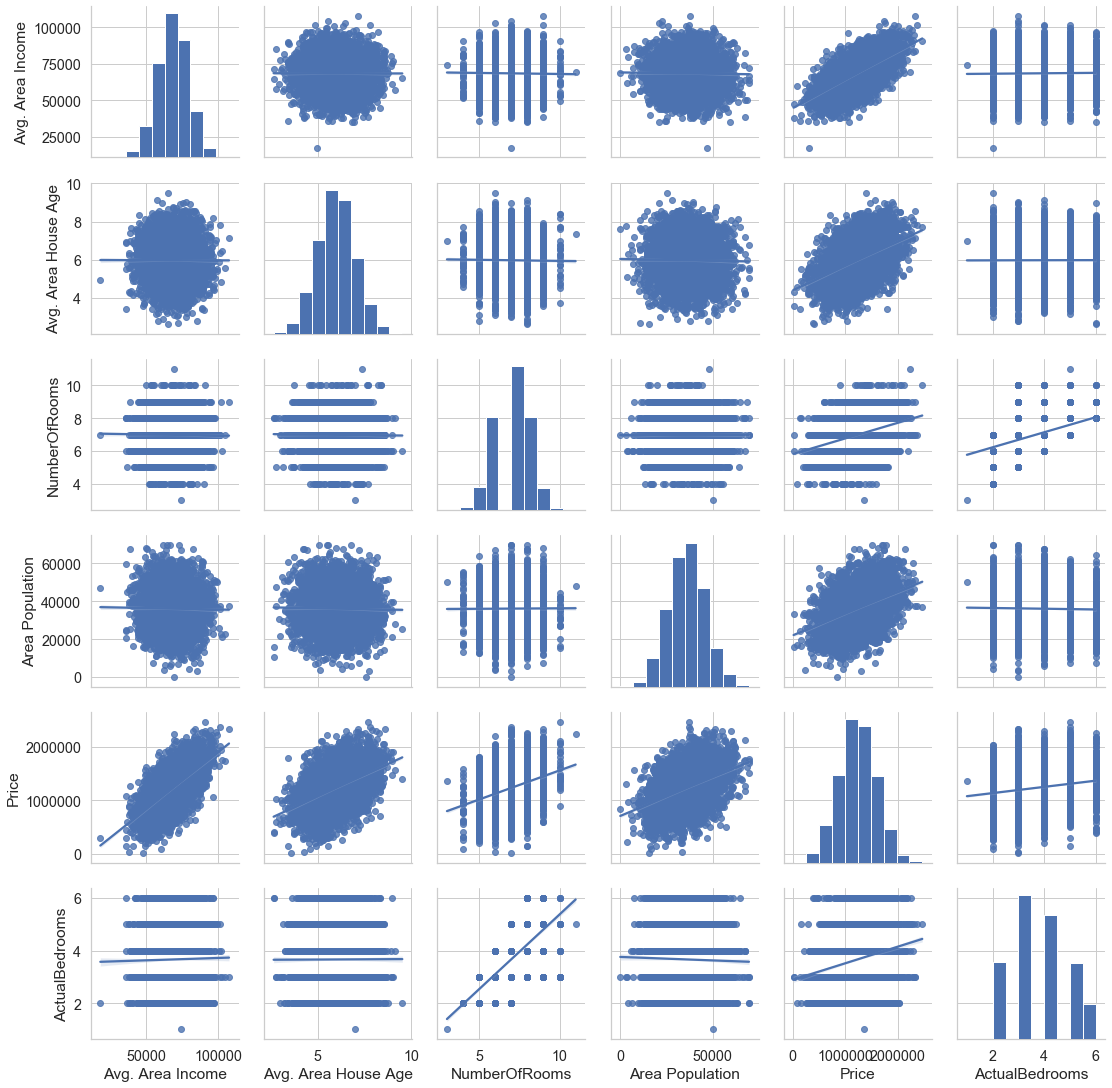

In [55]:
sns.pairplot(df[['Avg. Area Income','Avg. Area House Age','NumberOfRooms','Area Population','Price','ActualBedrooms']],kind='reg')

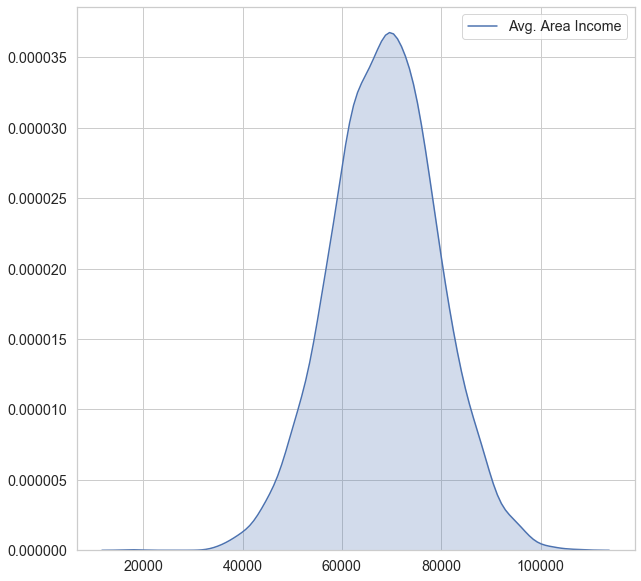

In [56]:
Kplot('Avg. Area Income')

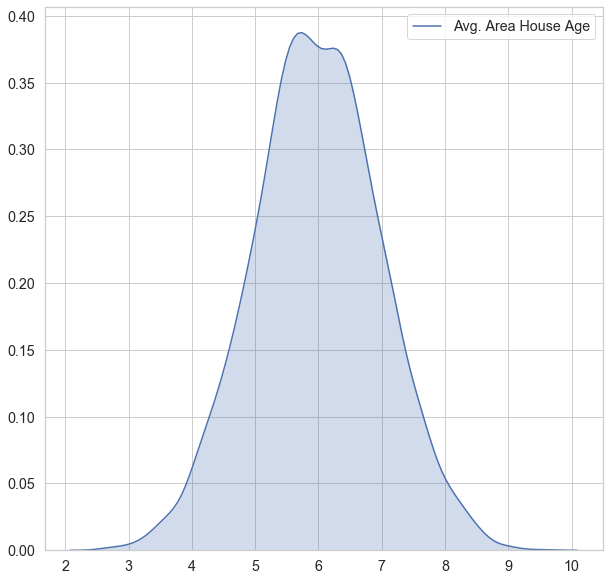

In [57]:
Kplot('Avg. Area House Age')


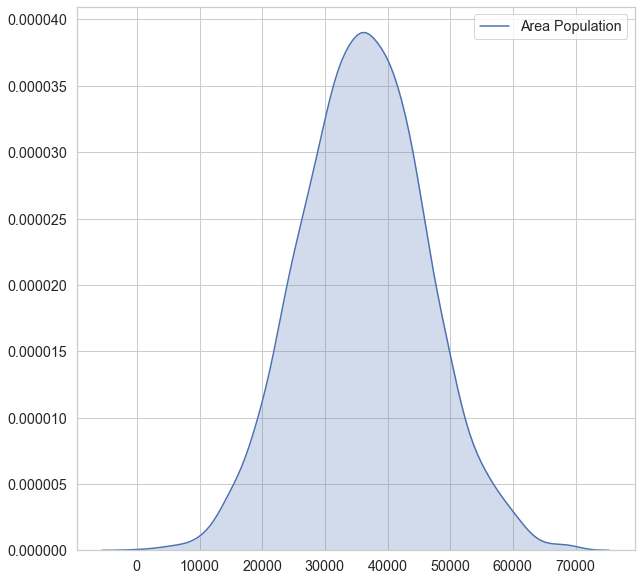

In [58]:
Kplot('Area Population')


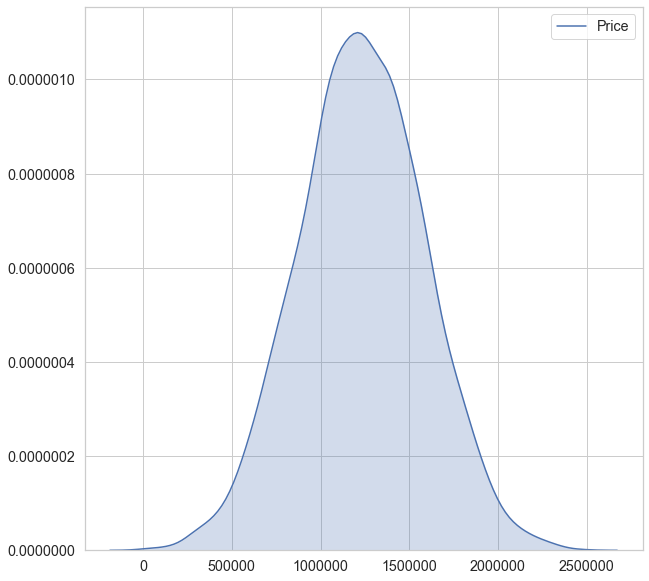

In [59]:
Kplot('Price')


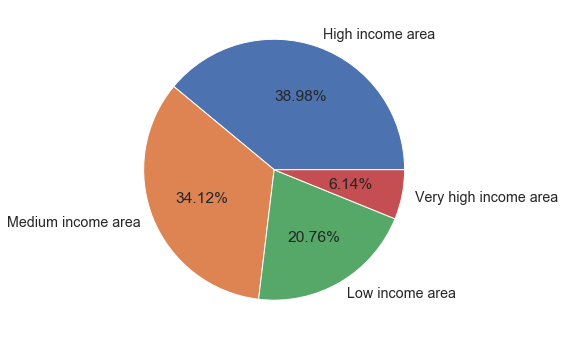

In [60]:
Pie('AreaIncomeCategory')

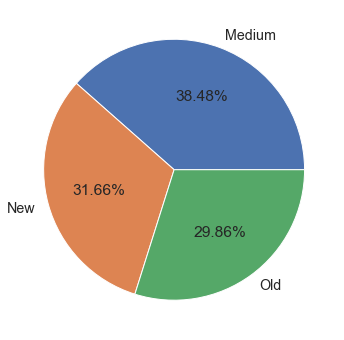

In [61]:
Pie('AreaHouseAgeCategory')

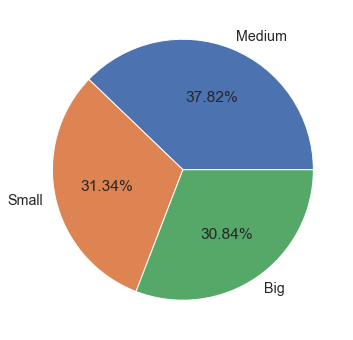

In [62]:
Pie('HouseSize')

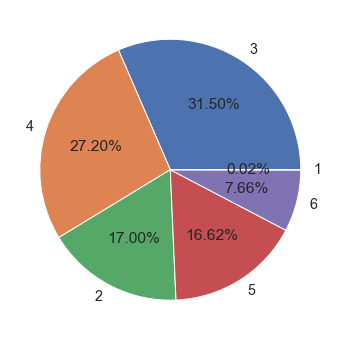

In [63]:
Pie('ActualBedrooms')

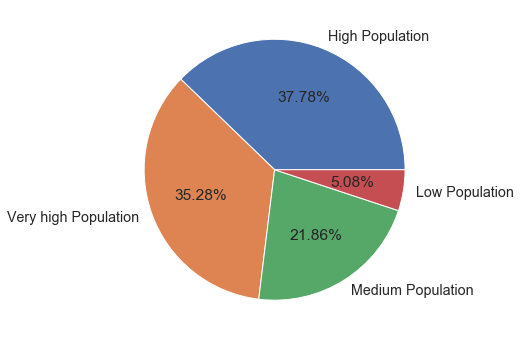

In [64]:
Pie('AreaPopulationCategory')

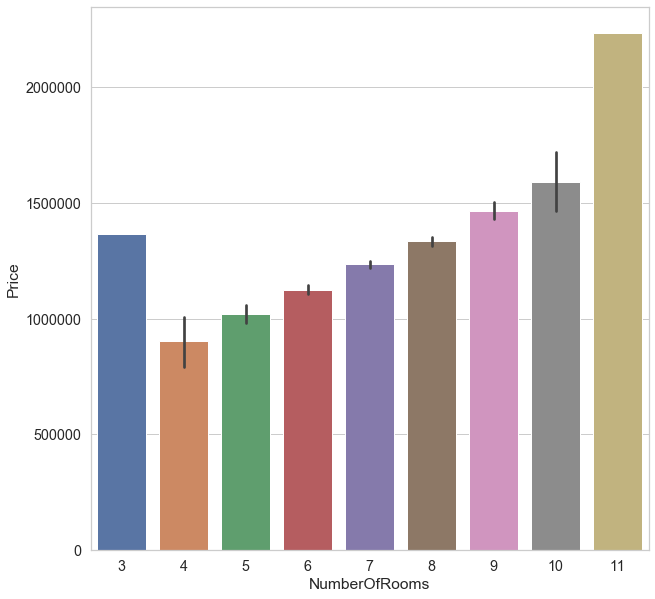

In [65]:
sns.barplot(x='NumberOfRooms',y='Price',data=df)

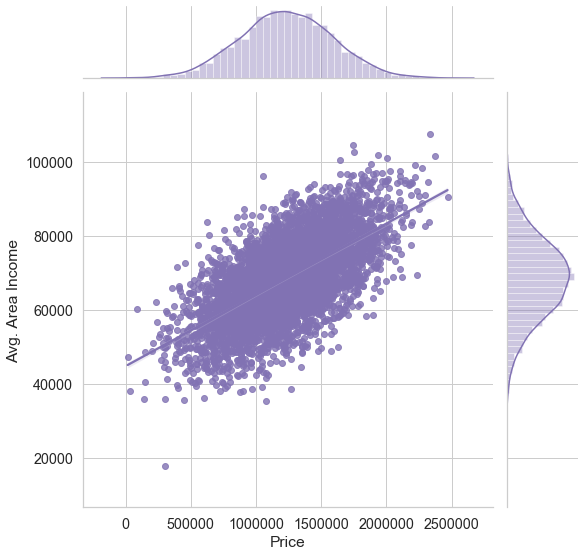

In [39]:
Jplot('Avg. Area Income')

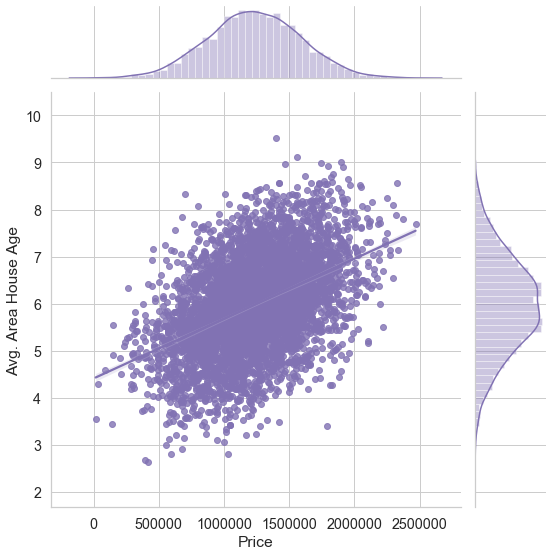

In [40]:
Jplot('Avg. Area House Age')

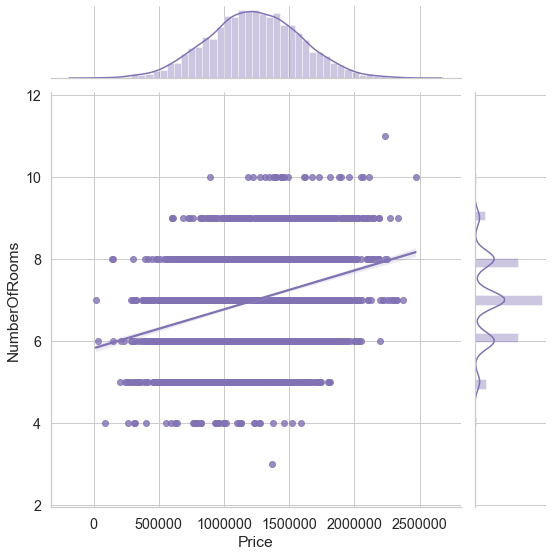

In [41]:
Jplot('NumberOfRooms')

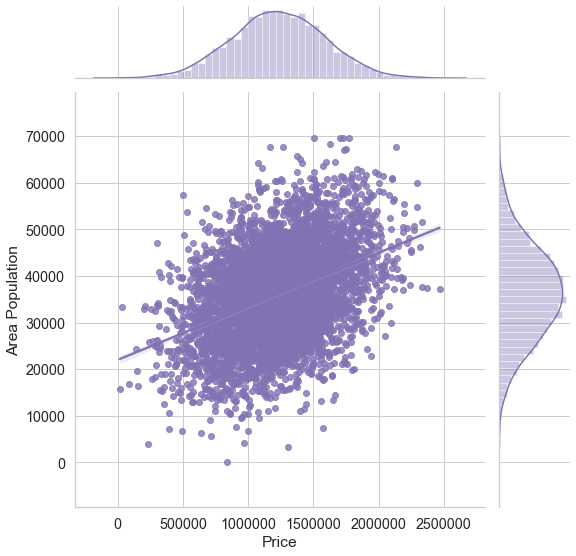

In [42]:
Jplot('Area Population')

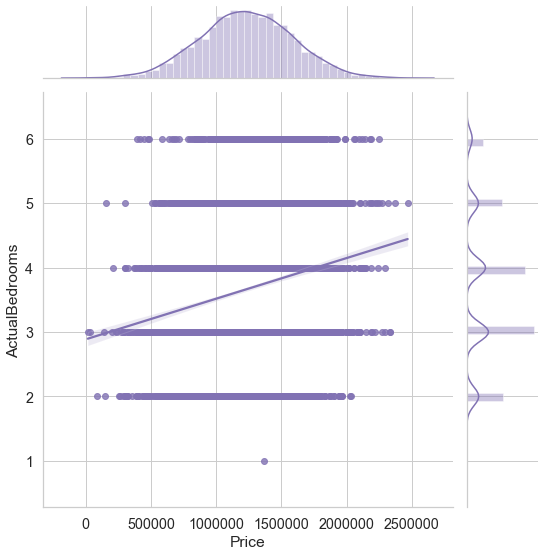

In [43]:
Jplot('ActualBedrooms')

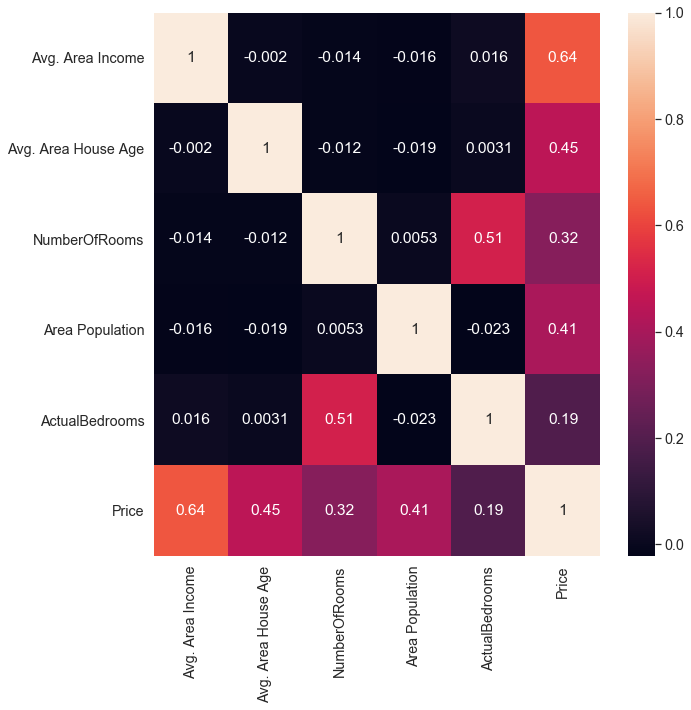

In [44]:
sns.heatmap(df[['Avg. Area Income', 'Avg. Area House Age', 'NumberOfRooms', 'Area Population',
                'ActualBedrooms','Price']].corr(), annot=True)

In [45]:
df[['Avg. Area Income', 'Avg. Area House Age', 'NumberOfRooms'
    , 'Area Population','ActualBedrooms','Price']].corr()

,Avg. Area Income,Avg. Area House Age,NumberOfRooms,Area Population,ActualBedrooms,Price
Avg. Area Income,1.000000,-0.002007,-0.013600,-0.016234,0.016230,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.011894,-0.018743,0.003079,0.452543
NumberOfRooms,-0.013600,-0.011894,1.000000,0.005292,0.509761,0.321108
Area Population,-0.016234,-0.018743,0.005292,1.000000,-0.022509,0.408556
ActualBedrooms,0.016230,0.003079,0.509761,-0.022509,1.000000,0.191190
Price,0.639734,0.452543,0.321108,0.408556,0.191190,1.000000


# 5) Data preparing

In [46]:
x=df[['Avg. Area Income', 'Avg. Area House Age','NumberOfRooms','Area Population','ActualBedrooms']]
x

,Avg. Area Income,Avg. Area House Age,NumberOfRooms,Area Population,ActualBedrooms
0,79545.458574,5.682861,7,23086.800503,4
1,79248.642455,6.002900,7,40173.072174,3
2,61287.067179,5.865890,9,36882.159400,5
3,63345.240046,7.188236,6,34310.242831,3
4,59982.197226,5.040555,8,26354.109472,4
...,...,...,...,...,...
4995,60567.944140,7.830362,6,22837.361035,3
4996,78491.275435,6.999135,7,25616.115489,4
4997,63390.686886,7.250591,5,33266.145490,2
4998,68001.331235,5.534388,7,42625.620156,5


In [47]:
y=df['Price']
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

## Splitting data into training and testing then scale data

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=22,shuffle=True)

In [49]:
scaler= StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

## Selecting Regression models  

In [50]:
models = {
    "LR": LinearRegression(),
    "KNNR" : KNeighborsRegressor(), 
    "SVR": SVR(),
    "DT": DecisionTreeRegressor(),
    "RF": RandomForestRegressor(),
    "XGBR": XGBRegressor()
}

## Evaluating the regression models and choosing the best model    

In [51]:
for name, model in models.items():
    print(f'Using model: {name}')
    model.fit(x_train, y_train)
    print(f'Training Score: {model.score(x_train, y_train)}')
    print(f'Test Score: {model.score(x_test, y_test)}')
    y_pred = model.predict(x_test)
    print(f'Mean Absolute Error Value is:{mean_absolute_error(y_test,y_pred)}')
    print(f'Mean squared Error Value is:{mean_squared_error(y_test,y_pred)}')
    print(f'Median Absolute Error Value is:{median_absolute_error(y_test,y_pred)}')  
    print('-'*30)

Using model: LR
Training Score: 0.9093630938522578
Test Score: 0.9100913469222547
Mean Absolute Error Value is:86970.03615421707
Mean squared Error Value is:11635640408.171158
Median Absolute Error Value is:76493.04385239864
------------------------------
Using model: KNNR
Training Score: 0.9071656466116131
Test Score: 0.8588243970204019
Mean Absolute Error Value is:108738.8225002355
Mean squared Error Value is:18270416633.39012
Median Absolute Error Value is:91060.16075058782
------------------------------
Using model: SVR
Training Score: 0.0009462246446613198
Test Score: 0.00021263573934626745
Mean Absolute Error Value is:288881.48838420026
Mean squared Error Value is:129388727969.38496
Median Absolute Error Value is:244872.11190590315
------------------------------
Using model: DT
Training Score: 1.0
Test Score: 0.7617850112085555
Mean Absolute Error Value is:139778.67887698667
Mean squared Error Value is:30828889706.722324
Median Absolute Error Value is:116260.60739194008
---------

In [53]:
SelectedModel = LinearRegression()
SelctedModelParameters={'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False]}

GridSearchModel = GridSearchCV(SelectedModel,SelctedModelParameters,cv =None)
GridSearchModel.fit(x_train,y_train)

print('Best Score is :', GridSearchModel.best_score_)
print('Best Parameters are :', GridSearchModel.best_params_)
print('Best Estimator is :', GridSearchModel.best_estimator_)

Best Score is : 0.9086681127532223
Best Parameters are : {'copy_X': True, 'fit_intercept': True, 'normalize': True}
Best Estimator is : LinearRegression(normalize=True)


In [54]:
model = LinearRegression(normalize=True)

model.fit(x_train, y_train)

LinearRegression(normalize=True)

## Predicting the values of testing data 

In [67]:
y_pred = model.predict(x_test)
y_pred

array([1642852.06022116, 1220735.34258227, 1417519.62548642,
       1374393.68538165, 1333860.43736449, 1709544.47213669,
       1051827.91877812, 1050771.48873712, 1528862.90664997,
       1046232.50841283, 1308713.12735126,  874528.12593633,
       1323457.21554358,  945102.06798723,  780687.26279688,
        952409.22614094, 1070729.40510843, 1113023.83339469,
       1045719.22322386, 1332079.22094004, 1123037.54595448,
       1305700.66174427,  967063.48123329, 1556534.9062964 ,
       1281700.1959961 , 1445993.787787  , 1148622.70830333,
       1488626.93795352, 1492100.90157052, 1600534.10996777,
        926096.98583293, 1597467.03727517,  773553.31676587,
       1357328.51190641, 1460554.01089155, 1166931.16061109,
       1024649.85779911,  807324.63634169, 1065449.87417757,
       1259689.35566589, 1241639.57383259,  904485.49461629,
       1394003.17022731,  894443.53955115, 1267894.28316331,
       1483362.54391662,  911086.54287764,  925291.915665  ,
       1577433.79666979,

In [66]:
y_test

1332    1.496724e+06
2844    1.117011e+06
4665    1.365945e+06
3408    1.226993e+06
975     1.433221e+06
            ...     
1181    1.183344e+06
4039    1.838984e+06
1503    1.384478e+06
1964    1.438291e+06
137     4.839861e+05
Name: Price, Length: 1000, dtype: float64

## Saving the scaler and choosen regression model 

In [60]:
joblib.dump(model, 'model.grpm3')

['model.grpm3']

In [61]:
joblib.dump(scaler, 'scaler.grpm3')

['scaler.grpm3']